# **INDIAN OCEAN RESTAURANT SALES ANALYSIS**

### **STEP-1 IMPORT ALL LIBRARIES**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scipy

<br>

### **STEP-2 STYLE SETTINGS**

In [125]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

<br>

### **STEP-3 LOAD AND CREATE DATAFRAME**

In [126]:
df = pd.read_csv("Salesreport_IO.csv")
print(df)

    S.no        Date        Day    Cash    Etfos  Uber Eats  Door dash  \
0      1  28-04-2025     Monday  110.00   306.98      70.68        0.0   
1      2  29-04-2025    Tuesday   27.00   330.90     247.10       32.7   
2      3  30-04-2025  Wednesday    0.00   327.33      96.46        0.0   
3      4  01-05-2025   Thursday   55.00   121.80      84.28       63.1   
4      5  02-05-2025     Friday   31.49   788.97     241.90       76.8   
..   ...         ...        ...     ...      ...        ...        ...   
65    66  02-07-2025  Wednesday    0.00   571.17     572.24       28.1   
66    67  03-07-2025   Thursday   47.48   596.10     352.24        0.0   
67    68  04-07-2025     Friday    0.00  1190.75     496.64        0.0   
68    69  05-07-2025   Saturday   27.98   767.79     918.51        0.0   
69    70  06-07-2025     Sunday  340.71   546.21     592.02       47.5   

    Website    Total  
0     38.89   526.55  
1     56.51   694.21  
2    148.63   572.42  
3    247.54   571.7

In [127]:
df

,S.no,Date,Day,Cash,Etfos,Uber Eats,Door dash,Website,Total
0,1,28-04-2025,Monday,110.00,306.98,70.68,0.0,38.89,526.55
1,2,29-04-2025,Tuesday,27.00,330.90,247.10,32.7,56.51,694.21
2,3,30-04-2025,Wednesday,0.00,327.33,96.46,0.0,148.63,572.42
3,4,01-05-2025,Thursday,55.00,121.80,84.28,63.1,247.54,571.72
4,5,02-05-2025,Friday,31.49,788.97,241.90,76.8,317.19,1456.35
...,...,...,...,...,...,...,...,...,...
65,66,02-07-2025,Wednesday,0.00,571.17,572.24,28.1,330.10,1501.61
66,67,03-07-2025,Thursday,47.48,596.10,352.24,0.0,55.64,1051.46
67,68,04-07-2025,Friday,0.00,1190.75,496.64,0.0,186.63,1874.02
68,69,05-07-2025,Saturday,27.98,767.79,918.51,0.0,159.92,1874.20


<br>

### **STEP-4 CLEANING THE DATA**

In [128]:
'''# Drop rows without a date
df = df.dropna(subset=['Date'])

# Convert Date to datetime object
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['Date'])

# Fill missing values with 0 in numeric columns
num_cols = ['Cash', 'Etfos', 'Uber Eats', 'Door dash', 'Website', 'Total']
df[num_cols] = df[num_cols].fillna(0)

# Feature engineering
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()'''
import pandas as pd

# Drop rows without a Date value
df = df.dropna(subset=['Date'])

# Convert 'Date' column to datetime (with dayfirst to handle DD/MM/YYYY format)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Drop rows again if date conversion failed (coerce turns invalid dates into NaT)
df = df.dropna(subset=['Date'])

# Ensure 'Date' column is actually datetime
assert pd.api.types.is_datetime64_any_dtype(df['Date']), "Date column is not datetime!"

# Fill missing values in numeric columns
num_cols = ['Cash', 'Etfos', 'Uber Eats', 'Door dash', 'Website', 'Total']
df[num_cols] = df[num_cols].fillna(0)

# Feature engineering
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()


<br>

### **STEP-5 ANALYSE TOTAL REVENUE BY DIFFERENT CHANNELS**

#### **5.1) BY ACTUAL NUMBERS**

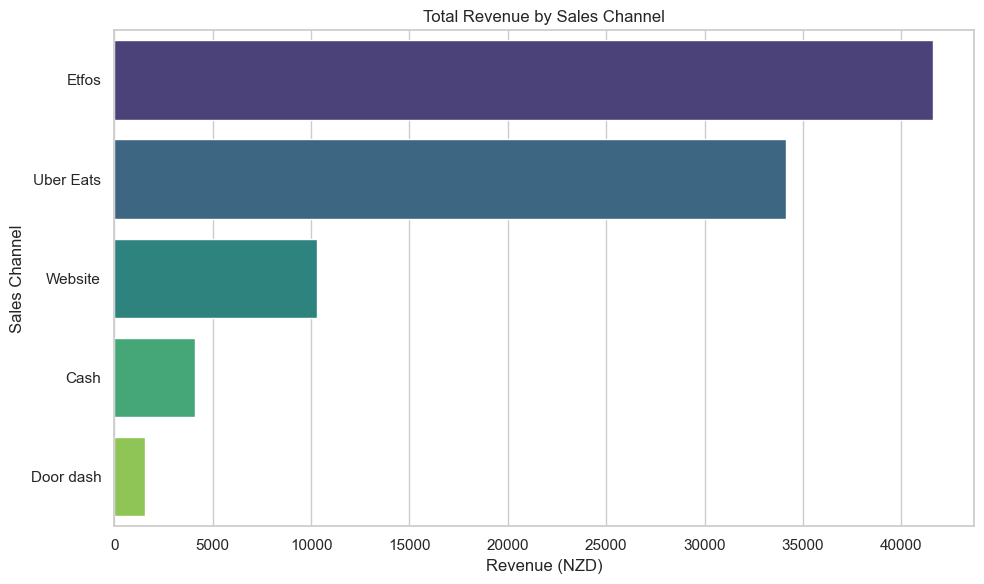

In [129]:
# Convert revenue totals to a DataFrame
channel_cols = ['Cash', 'Etfos', 'Uber Eats', 'Door dash', 'Website']
channel_totals = df[channel_cols].sum().sort_values(ascending=False)
channel_df = channel_totals.reset_index()
channel_df.columns = ['Channel', 'Revenue']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_df, x='Revenue', y='Channel', hue='Channel', palette='viridis', legend=False)
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Revenue (NZD)')
plt.ylabel('Sales Channel')
plt.tight_layout()
plt.show()

<br>

#### **5.2) BY PERCENTAGE**

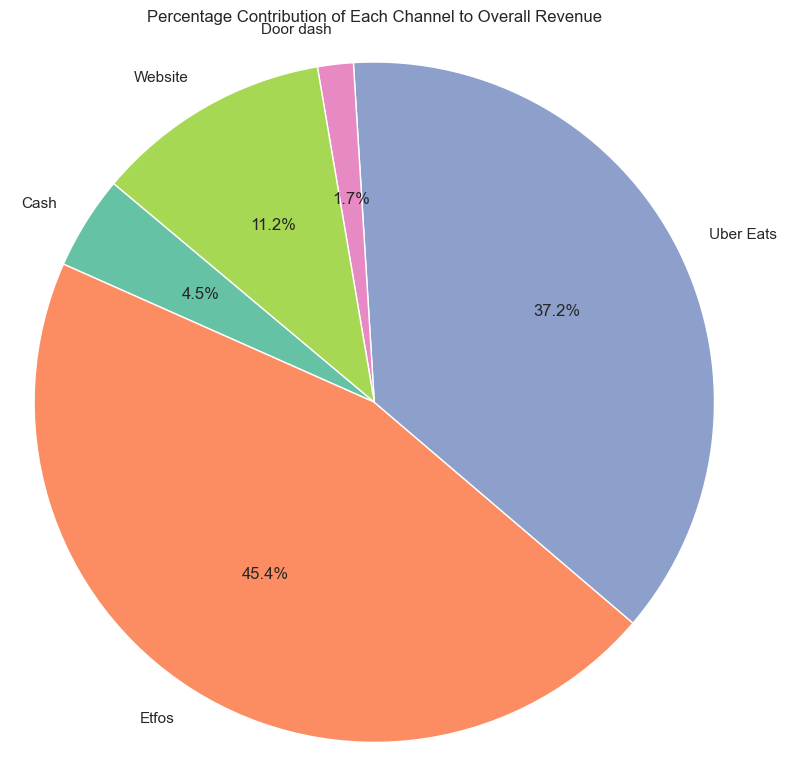

In [130]:
#total revenue contribution by each channel as percentage
df_contribution = df[channel_cols].sum()
df_contribution_percent = (df_contribution / df['Total'].sum()) * 100

#pie chart of revenue contribution
plt.figure(figsize=(8, 8))
plt.pie(
    df_contribution_percent,
    labels=df_contribution_percent.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2")
)
plt.title('Percentage Contribution of Each Channel to Overall Revenue')
plt.axis('equal')  #equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()

<br>

<BR>

### **STEP-6 ANALYSIS OF DAILY TOTAL REVENUE TREND**

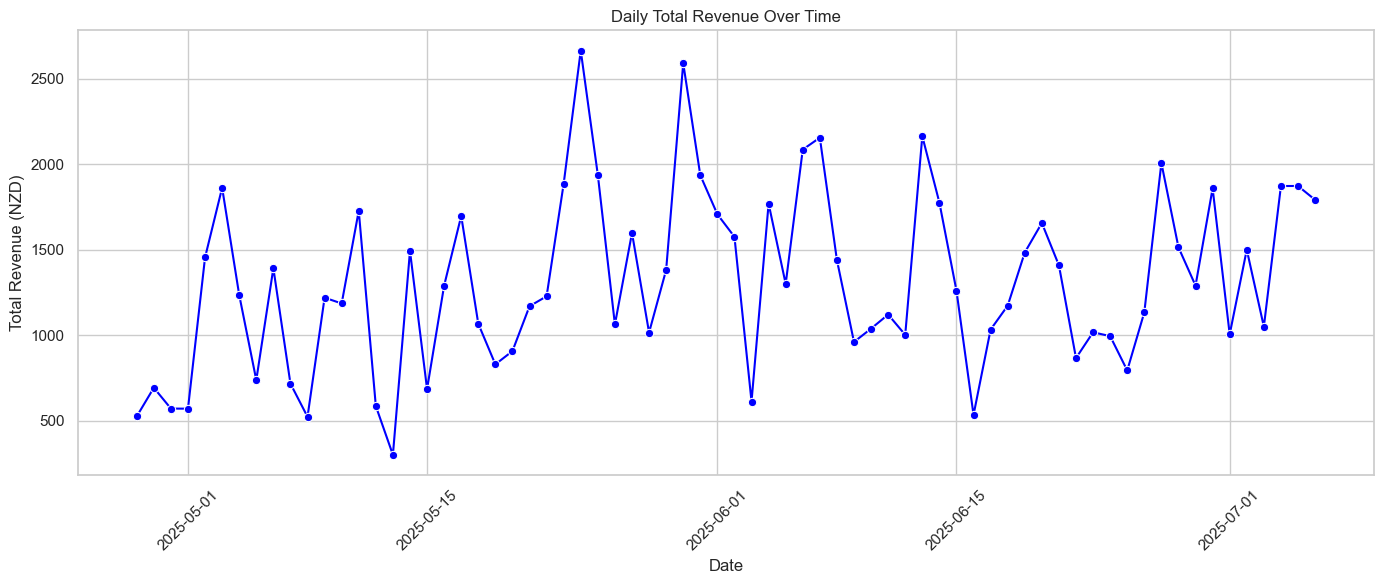

In [131]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Total', marker='o', color='blue')
plt.title('Daily Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue (NZD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<BR>

### **STEP-7 ANALYSE THE AVERAGE REVENUE BY WEEKDAY(PER CHANNEL)**

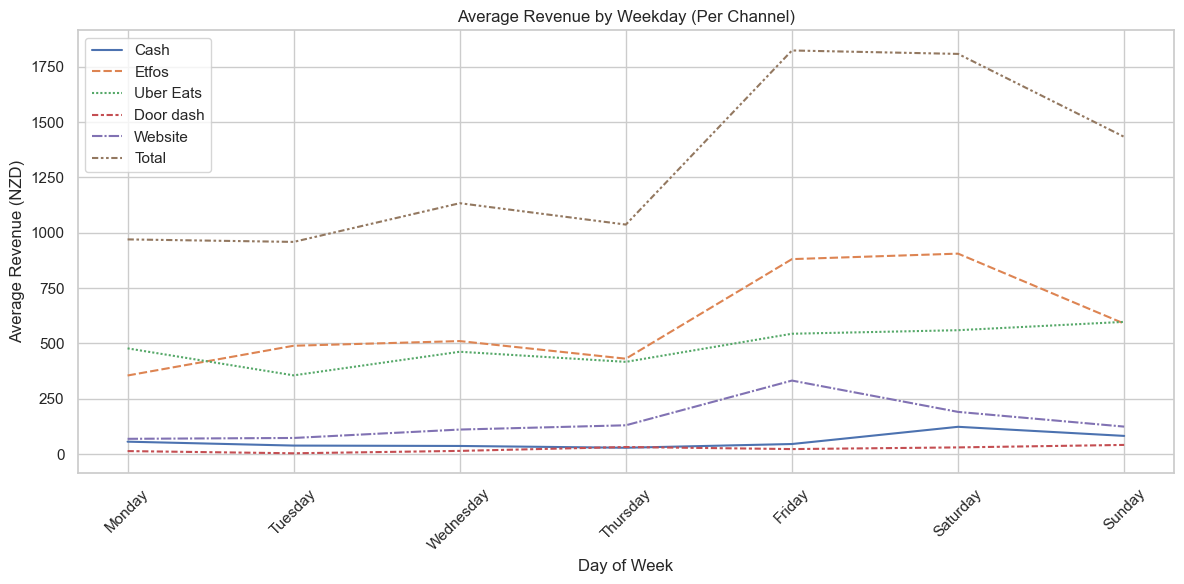

In [132]:
#group the data by weekday and calculate the average revenue per channel
weekday_avg = df.groupby('Weekday')[channel_cols + ['Total']].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

#plotting a lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekday_avg)
plt.title('Average Revenue by Weekday (Per Channel)')
plt.xlabel('Day of Week')
plt.ylabel('Average Revenue (NZD)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<br>

### **STEP-8 PLOT A CORRELATION HEATMAP OF CHANNELS AND TOTAL REVENUE**

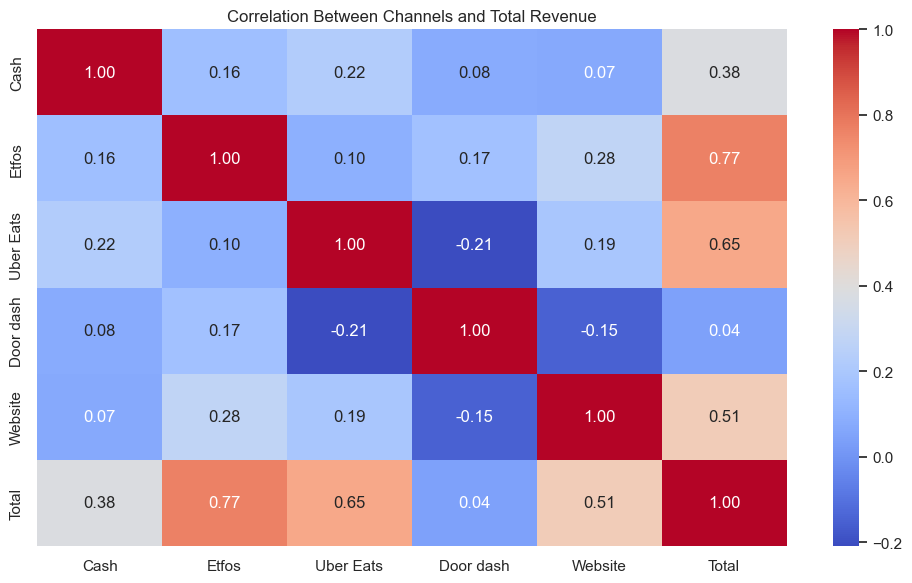

In [133]:
#correlation heatmap
plt.figure(figsize=(10, 6))

#construct a correlation matrix
corr_matrix = df[channel_cols + ['Total']].corr()

#plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Channels and Total Revenue')
plt.tight_layout()
plt.show()

<BR>

### **STEP-9 ANALYSE THE AVERAGE REVENUE BY DIFFERENT CHANNELS ACROSS MONTHS**

<Figure size 1200x600 with 0 Axes>

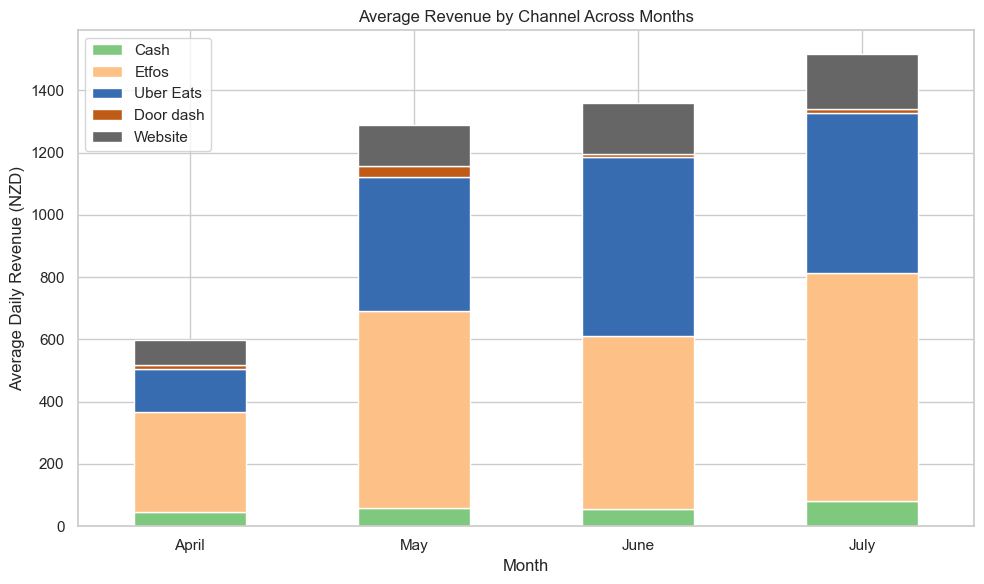

In [134]:
df['Month'] = df['Date'].dt.month_name()
monthly_avg = df.groupby('Month')[channel_cols].mean().reindex(['April', 'May', 'June', 'July'], fill_value=0)

#plot average revenue as a stacked bar chart
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Average Revenue by Channel Across Months')
plt.ylabel('Average Daily Revenue (NZD)')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<BR>

### **STEP-10 ANALYSE CUMULATIVE REVENUE OVER WRT DATE**

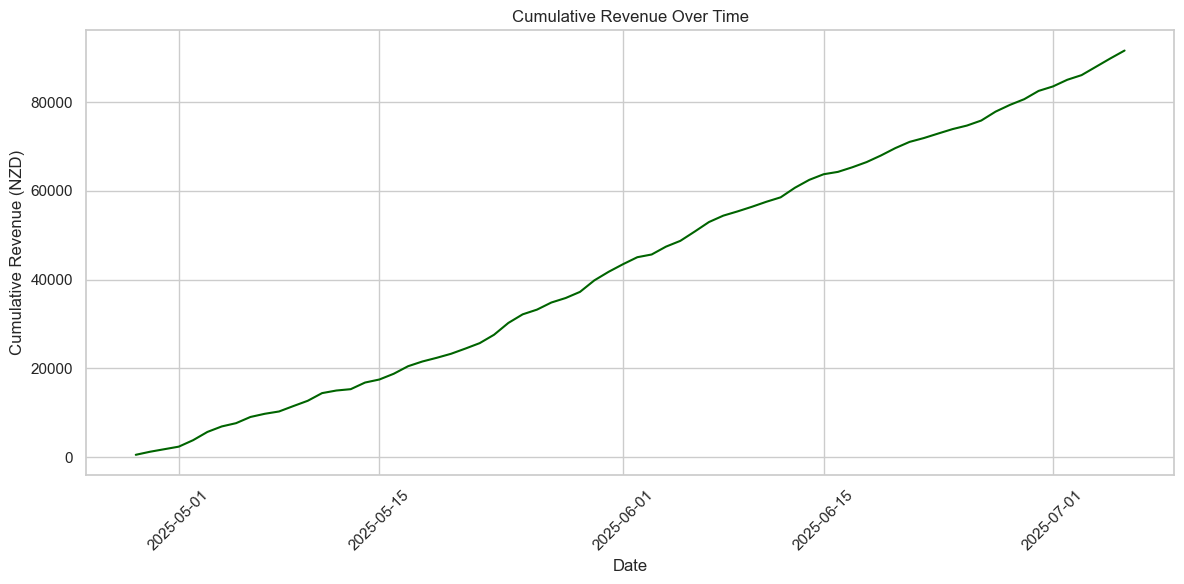

In [135]:
#sort 
df_sorted = df.sort_values('Date')
df_sorted['Cumulative Revenue'] = df_sorted['Total'].cumsum()

#plot lineplot of cumulative revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sorted, x='Date', y='Cumulative Revenue', color='darkgreen')
plt.title('Cumulative Revenue Over Time')
plt.ylabel('Cumulative Revenue (NZD)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<br>

### **STEP-11 ANALYSING THE FREQUENCIES OF DAILY TOTAL REVENUE**

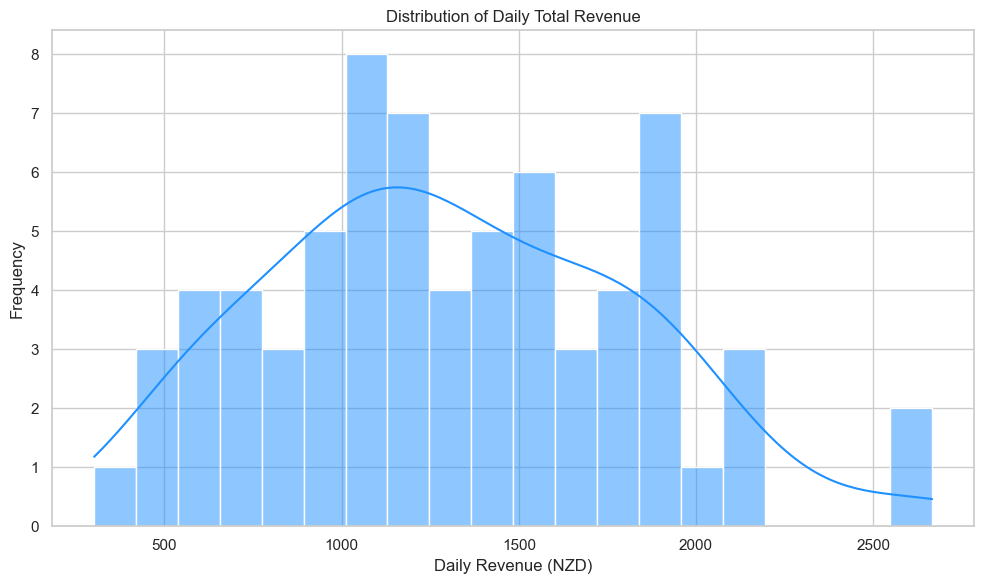

In [136]:
#histogram displaying number of days the revenue was around the same range with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=20, kde=True, color='dodgerblue')
plt.title('Distribution of Daily Total Revenue')
plt.xlabel('Daily Revenue (NZD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<br>

### **STEP-12 STATISTICAL SUMMARY OF REVENUE**

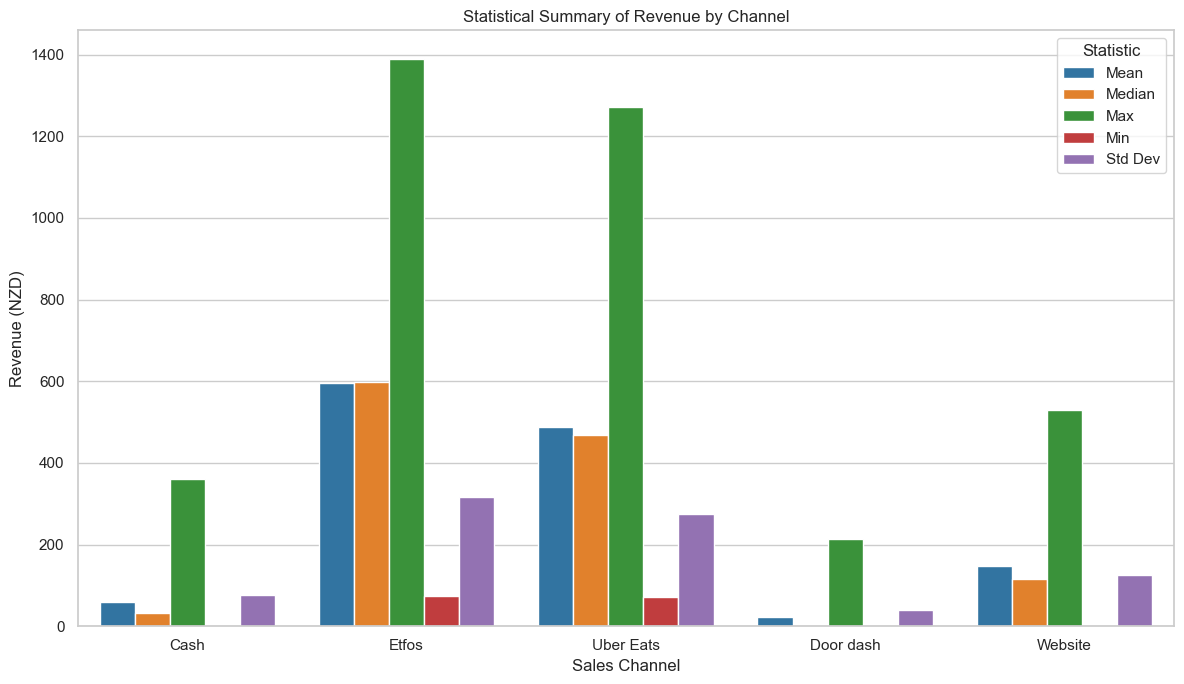

In [137]:
#aggregate statistics for each sales channel
channel_cols = ['Cash', 'Etfos', 'Uber Eats', 'Door dash', 'Website']
channel_stats = df[channel_cols].agg(['mean', 'median', 'max', 'min', 'std']).T.reset_index()
channel_stats.columns = ['Channel', 'Mean', 'Median', 'Max', 'Min', 'Std Dev']

#melt the dataframe for seaborn plotting
channel_stats_melted = pd.melt(
    channel_stats,
    id_vars='Channel',
    value_vars=['Mean', 'Median', 'Max', 'Min', 'Std Dev'],
    var_name='Statistic',
    value_name='Value'
)

#plot the statistical summary using a grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    data=channel_stats_melted,
    x='Channel',
    y='Value',
    hue='Statistic',
    palette='tab10'
)
plt.title('Statistical Summary of Revenue by Channel')
plt.ylabel('Revenue (NZD)')
plt.xlabel('Sales Channel')
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

<br>

<br>

## **SOME ADVANCED DATA ANALYTICS**

###  **1) Anomaly Detection using Z-score**

In [138]:
from scipy.stats import zscore

df['Z_score_total'] = zscore(df['Total'])
anomalies = df[np.abs(df['Z_score_total']) > 2]

print(f"🔍 Anomalies Detected (Z-score > 2): {len(anomalies)} days")
display(anomalies[['Date', 'Total', 'Z_score_total']])

🔍 Anomalies Detected (Z-score > 2): 2 days


,Date,Total,Z_score_total
26,2025-05-24,2665.87,2.651814
32,2025-05-30,2592.17,2.507727


<br>

### **2) KMeans Clustering on Channel Sales**

c:\Users\A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


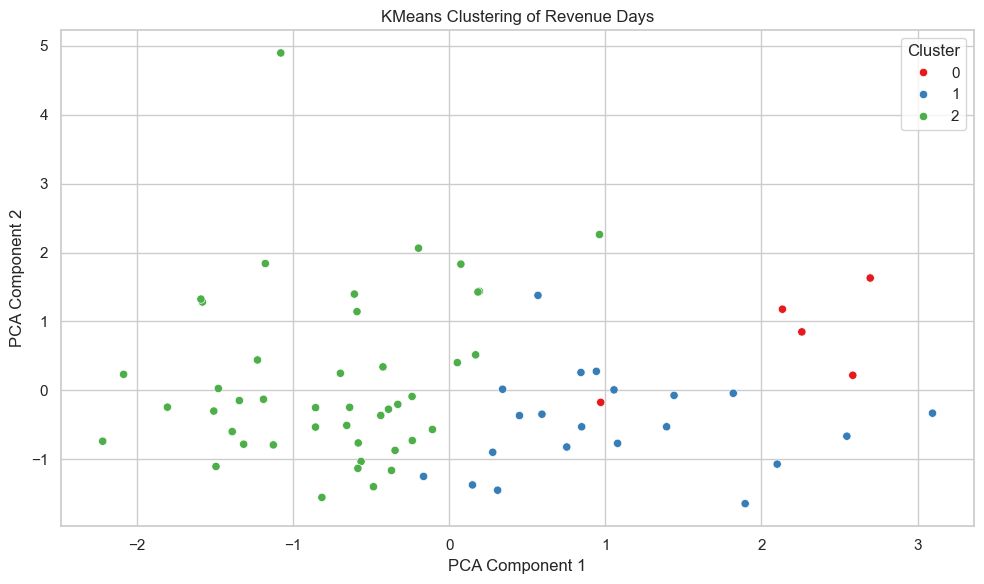

In [139]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#standardize features
X = df[['Cash', 'Etfos', 'Uber Eats', 'Door dash', 'Website']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#pca for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Kmeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1')
plt.title("KMeans Clustering of Revenue Days")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

<br>

### **3) REVENUE TYPE: HIGH VS LOW**

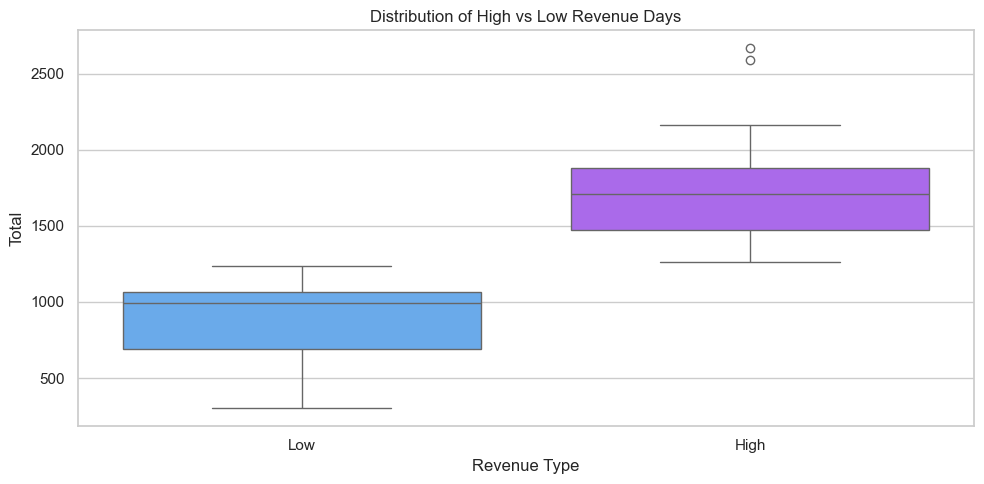

In [140]:
median_revenue = df['Total'].median()
df['Revenue Type'] = df['Total'].apply(lambda x: 'High' if x >= median_revenue else 'Low')

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Revenue Type', y='Total', hue='Revenue Type', palette='cool',legend= False)
plt.title('Distribution of High vs Low Revenue Days')
plt.tight_layout()
plt.show()

                                                                   *  *  *